
Correlation analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


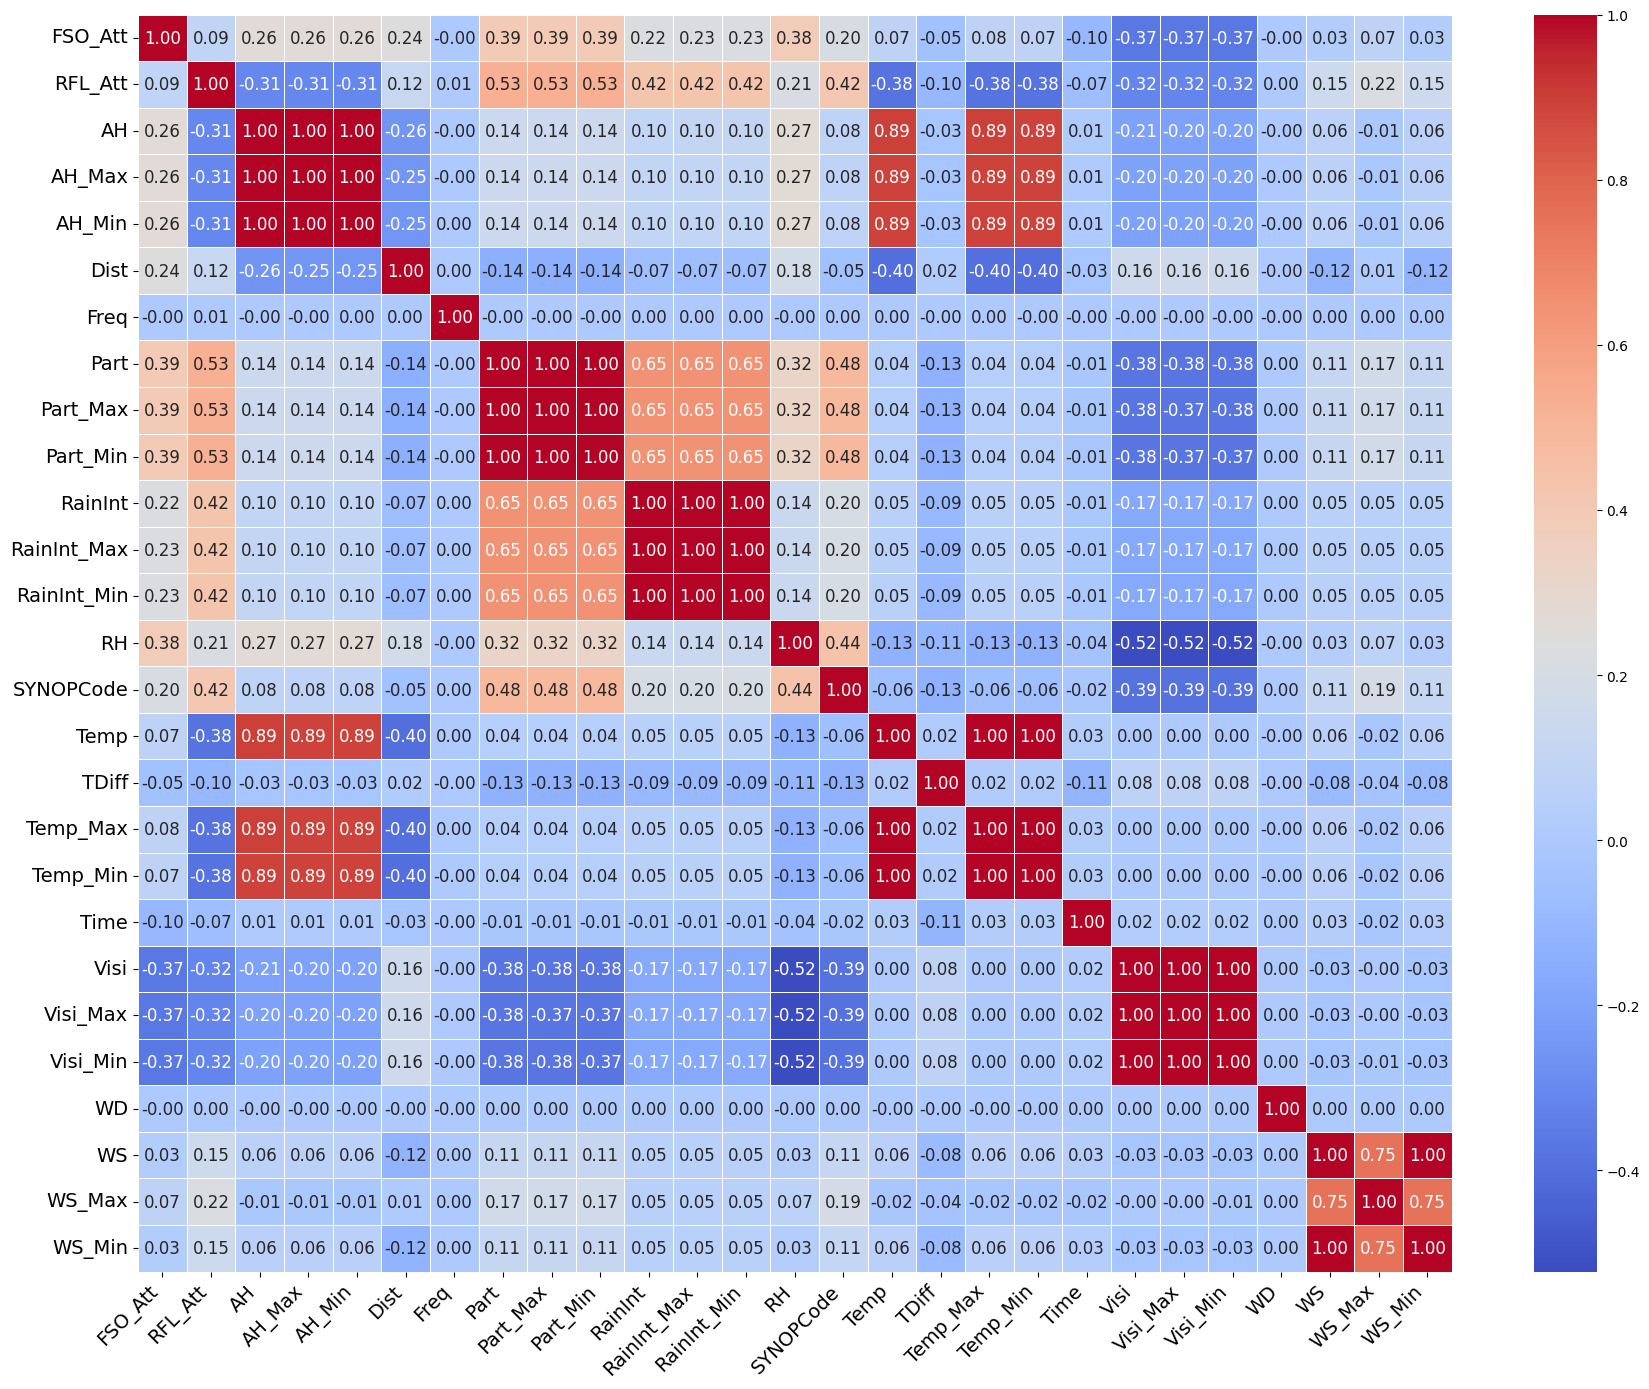

In [2]:
# Load and preprocess the data
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)

    columns_dict = {
        "FSO_Att": "FSO_Att",
        "RFL_Att": "RFL_Att",
        "AbsoluteHumidity": "AH",
        "AbsoluteHumidityMax": "AH_Max",
        "AbsoluteHumidityMin": "AH_Min",
        "Distance": "Dist",
        "Frequency": "Freq",
        "Particulate": "Part",
        "ParticulateMax": "Part_Max",
        "ParticulateMin": "Part_Min",
        "RainIntensity": "RainInt",
        "RainIntensityMax": "RainInt_Max",
        "RainIntensityMin": "RainInt_Min",
        "RelativeHumidity": "RH",
        "SYNOPCode": "SYNOPCode",
        "Temperature": "Temp",
        "TemperatureDifference": "TDiff",
        "TemperatureMax": "Temp_Max",
        "TemperatureMin": "Temp_Min",
        "Time": "Time",
        "Visibility": "Visi",
        "VisibilityMax": "Visi_Max",
        "VisibilityMin": "Visi_Min",
        "WindDirection": "WD",
        "WindSpeed": "WS",
        "WindSpeedMax": "WS_Max",
        "WindSpeedMin": "WS_Min"
    }
    data.rename(columns=columns_dict, inplace=True)
    return data

# Load and preprocess the data
data = load_and_preprocess_data('/content/drive/MyDrive/data/RFLFSODataFull.csv')

# Correlation matrix heatmap
plt.figure(figsize=(18, 14))  # Increase figure size for better readability
correlation_matrix = data.corr()

# Set up the heatmap with larger annotations
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Rotate the x-axis and y-axis labels if necessary
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Adjust the layout to make sure everything fits
plt.tight_layout()
plt.show()

Target Variables Analysis

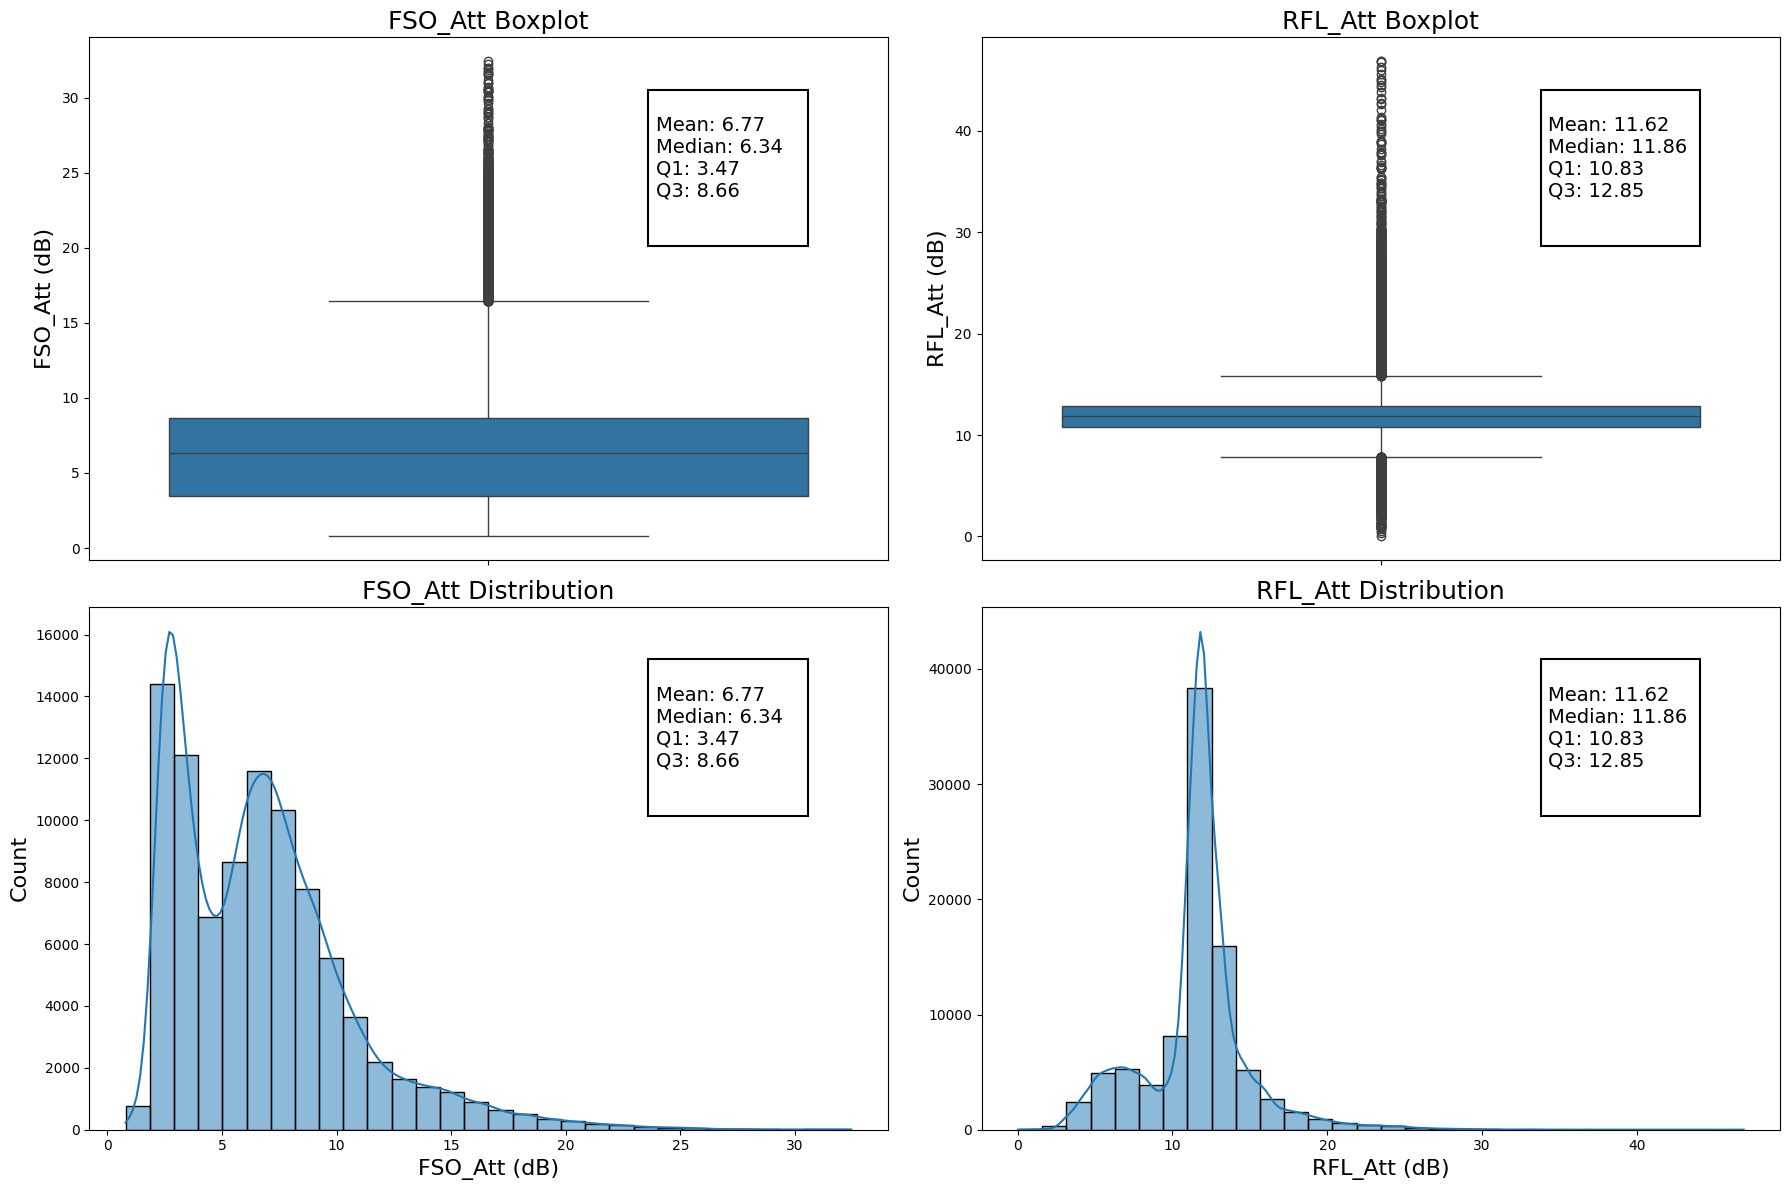

In [4]:
from matplotlib.patches import Rectangle

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot boxplots for FSO_Att and RFL_Att in the first row
sns.boxplot(y=data['FSO_Att'], ax=axes[0, 0])
axes[0, 0].set_title('FSO_Att Boxplot', fontsize=18)
axes[0, 0].set_ylabel('FSO_Att (dB)', fontsize=16)

sns.boxplot(y=data['RFL_Att'], ax=axes[0, 1])
axes[0, 1].set_title('RFL_Att Boxplot', fontsize=18)
axes[0, 1].set_ylabel('RFL_Att (dB)', fontsize=16)

# Annotate boxplots with summary statistics inside a square box
def add_summary_stats(data, axis):
    stats = data.describe()
    stats_text = '\n'.join(
        [f'Mean: {stats["mean"]:.2f}', f'Median: {stats["50%"]:.2f}',
         f'Q1: {stats["25%"]:.2f}', f'Q3: {stats["75%"]:.2f}']
    )
    axis.add_patch(Rectangle((0.7, 0.6), 0.2, 0.3, transform=axis.transAxes,
                             edgecolor='black', facecolor='white', lw=1.5))
    axis.text(0.71, 0.85, stats_text, transform=axis.transAxes, fontsize=14, verticalalignment='top')

add_summary_stats(data['FSO_Att'], axes[0, 0])
add_summary_stats(data['RFL_Att'], axes[0, 1])

# Plot distributions for FSO_Att and RFL_Att in the second row
sns.histplot(data=data['FSO_Att'], bins=30, kde=True, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('FSO_Att Distribution', fontsize=18)
axes[1, 0].set_xlabel('FSO_Att (dB)', fontsize=16)
axes[1, 0].set_ylabel('Count', fontsize=16)

sns.histplot(data=data['RFL_Att'], bins=30, kde=True, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('RFL_Att Distribution', fontsize=18)
axes[1, 1].set_xlabel('RFL_Att (dB)', fontsize=16)
axes[1, 1].set_ylabel('Count', fontsize=16)

# Annotate distributions with summary statistics inside a square box
add_summary_stats(data['FSO_Att'], axes[1, 0])
add_summary_stats(data['RFL_Att'], axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

Predictor Variables Analysis - Metadata

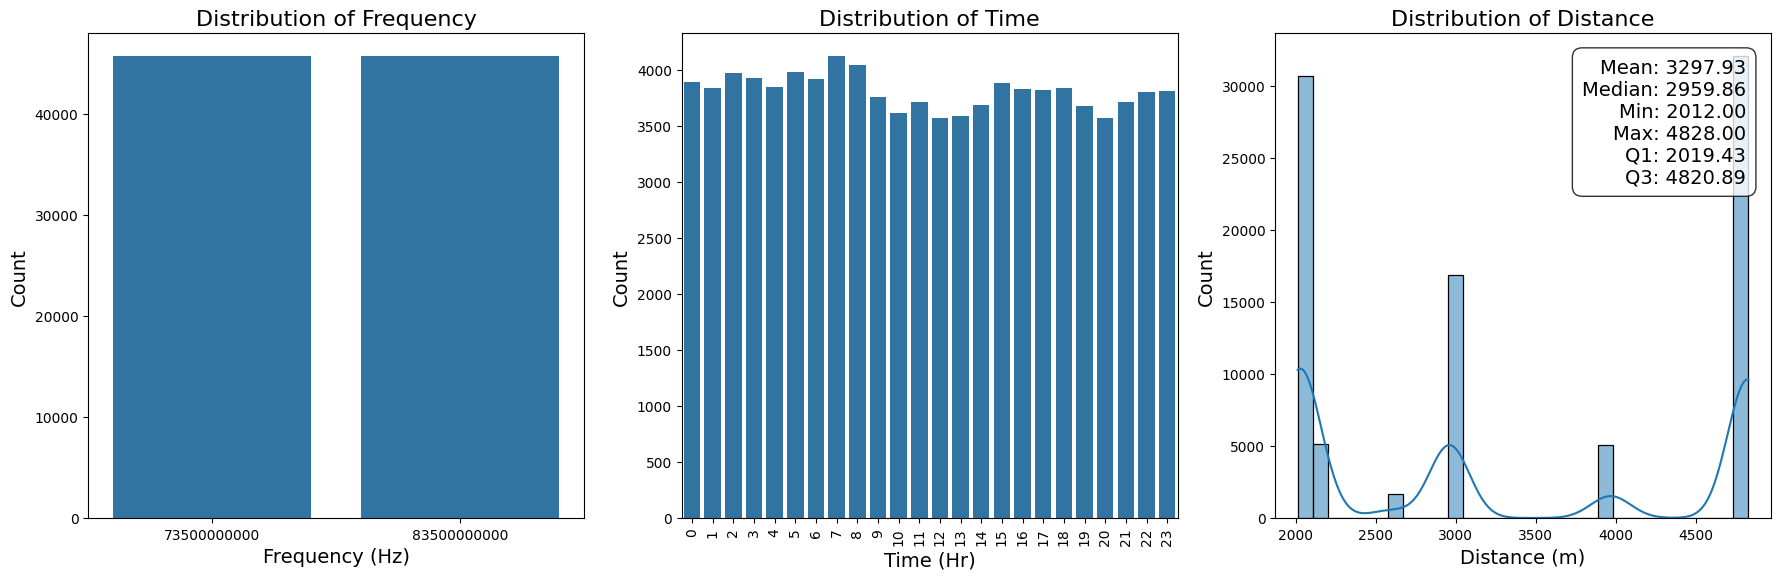

In [5]:
# Define the variables
variables = ['Freq', 'Time', 'Dist']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Function to add summary statistics to a plot
def add_summary_stats(ax, data, variable):
    stats_text = (f"Mean: {data.mean():.2f}\n"
                  f"Median: {data.median():.2f}\n"
                  f"Min: {data.min():.2f}\n"
                  f"Max: {data.max():.2f}\n"
                  f"Q1: {data.quantile(0.25):.2f}\n"
                  f"Q3: {data.quantile(0.75):.2f}")
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Set global font size
plt.rcParams.update({'font.size': 13})  # Adjust global font size

# Plot Frequency (Bar plot for categorical variable)
sns.countplot(data=data, x='Freq', ax=axes[0])
axes[0].set_title('Distribution of Frequency', fontsize=16)
axes[0].set_xlabel('Frequency (Hz)', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

# Plot Time (Bar plot for categorical variable)
sns.countplot(data=data, x='Time', ax=axes[1])
axes[1].set_title('Distribution of Time', fontsize=16)
axes[1].set_xlabel('Time (Hr)', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot Distance (Histogram for numerical variable)
sns.histplot(data=data, x='Dist', bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Distance', fontsize=16)
axes[2].set_xlabel('Distance (m)', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
add_summary_stats(axes[2], data['Dist'], 'Distance')

# Adjust layout
plt.tight_layout()
plt.show()

Predictor Variables Analysis - Weather data

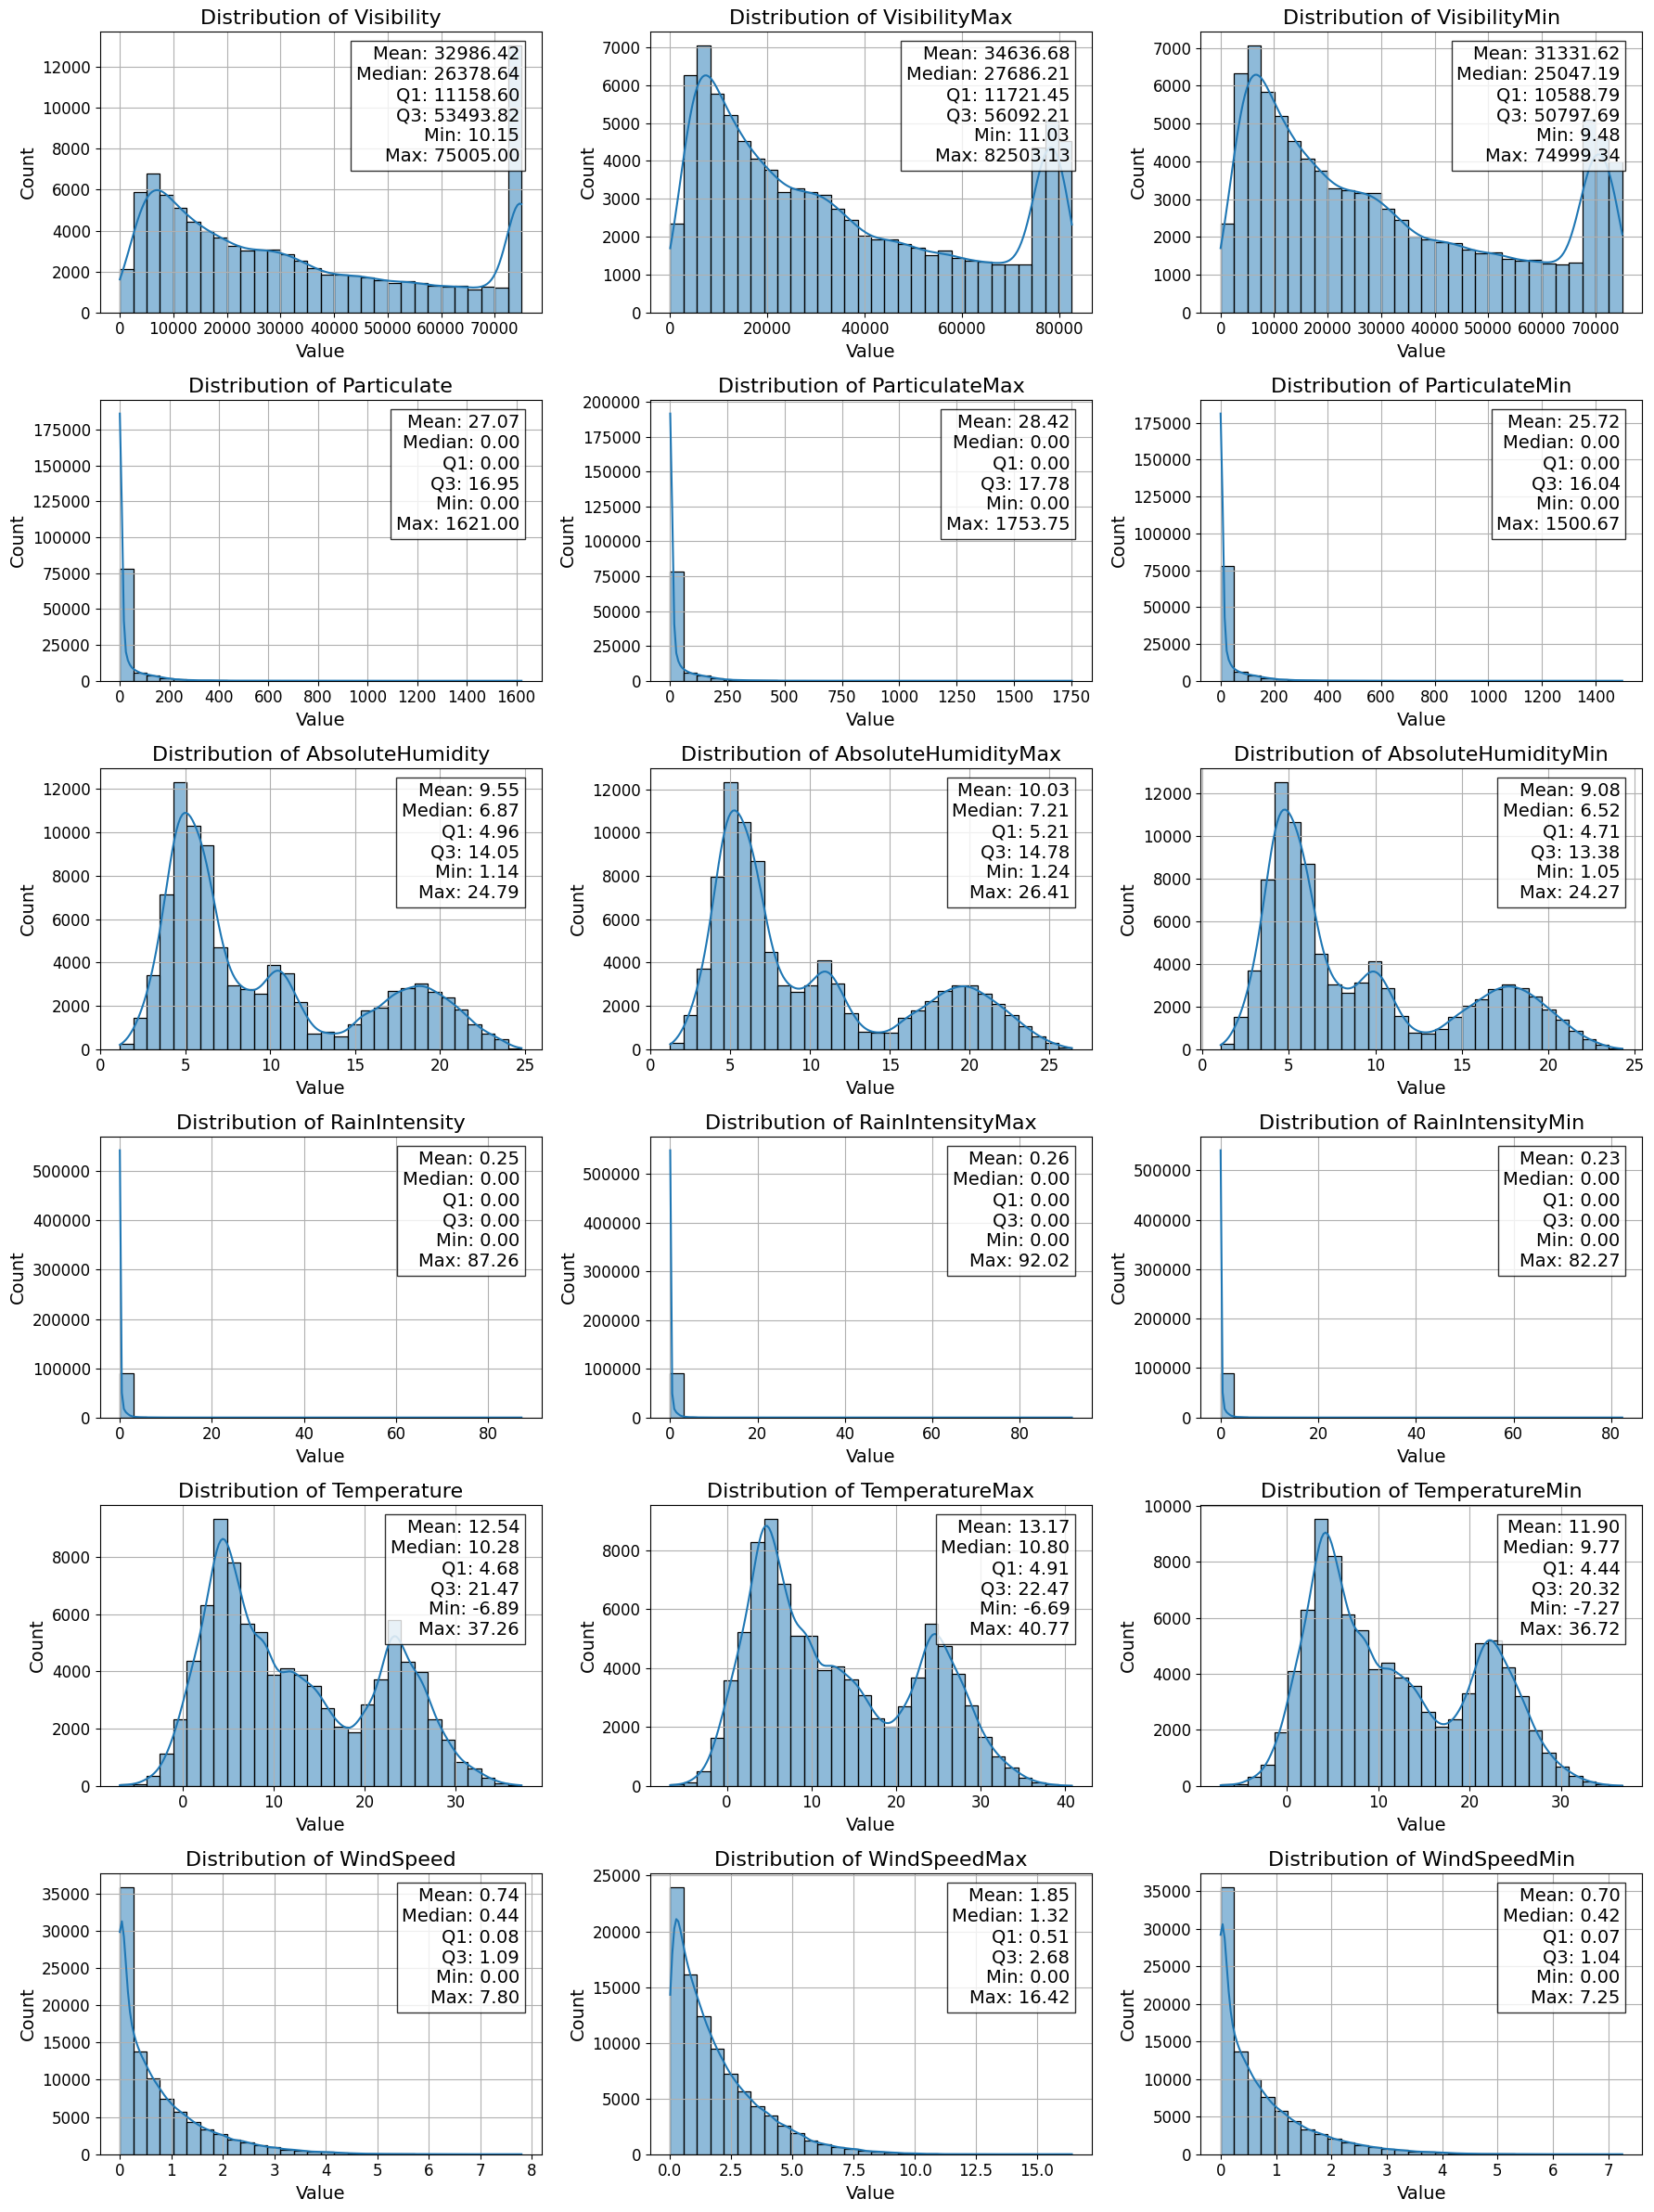

In [7]:
# Melt the data to have all visibility measures in a single column
melted_data_visibility = data.melt(value_vars=['Visi', 'Visi_Max', 'Visi_Min'],
                                   var_name='VisibilityType', value_name='Value')

# Melt the data to have all particulate measures in a single column
melted_data_particulate = data.melt(value_vars=['Part', 'Part_Max', 'Part_Min'],
                                    var_name='ParticulateType', value_name='Value')

# Melt the data to have all absolute humidity measures in a single column
melted_data_AbsoluteHumidity = data.melt(value_vars=['AH', 'AH_Max', 'AH_Min'],
                                         var_name='AbsoluteHumidityType', value_name='Value')

# Melt the data to have all rain intensity measures in a single column
melted_data_RainIntensity = data.melt(value_vars=['RainInt', 'RainInt_Max', 'RainInt_Min'],
                                      var_name='RainIntensityType', value_name='Value')

# Melt the data to have all temperature measures in a single column
melted_data_Temperature = data.melt(value_vars=['Temp', 'Temp_Max', 'Temp_Min'],
                                    var_name='TemperatureType', value_name='Value')

# Melt the data to have all wind speed measures in a single column
melted_data_WindSpeed = data.melt(value_vars=['WS', 'WS_Max', 'WS_Min'],
                                  var_name='WindSpeedType', value_name='Value')

# Set global font size for the plots
plt.rcParams.update({'font.size': 12})  # Adjust this value as needed

# Assuming you have already melted the data for each variable group as shown earlier

# Create subplots for histograms
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))

# Function to annotate summary statistics
def annotate_summary_stats(data, ax):
    mean = data.mean()
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    minimum = data.min()
    maximum = data.max()
    stats_text = f"Mean: {mean:.2f}\nMedian: {median:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMin: {minimum:.2f}\nMax: {maximum:.2f}"
    ax.text(0.95, 0.95, stats_text, verticalalignment='top', horizontalalignment='right',
            transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

# Draw histograms for Visibility measures
sns.histplot(data=melted_data_visibility[melted_data_visibility['VisibilityType'] == 'Visi'], x='Value', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Visibility', fontsize=16)
axes[0, 0].set_xlabel('Value', fontsize=14)
axes[0, 0].set_ylabel('Count', fontsize=14)
axes[0, 0].grid(True)  # Add grid
annotate_summary_stats(melted_data_visibility[melted_data_visibility['VisibilityType'] == 'Visi']['Value'], axes[0, 0])

sns.histplot(data=melted_data_visibility[melted_data_visibility['VisibilityType'] == 'Visi_Max'], x='Value', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of VisibilityMax', fontsize=16)
axes[0, 1].set_xlabel('Value', fontsize=14)
axes[0, 1].set_ylabel('Count', fontsize=14)
axes[0, 1].grid(True)  # Add grid
annotate_summary_stats(melted_data_visibility[melted_data_visibility['VisibilityType'] == 'Visi_Max']['Value'], axes[0, 1])

sns.histplot(data=melted_data_visibility[melted_data_visibility['VisibilityType'] == 'Visi_Min'], x='Value', bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of VisibilityMin', fontsize=16)
axes[0, 2].set_xlabel('Value', fontsize=14)
axes[0, 2].set_ylabel('Count', fontsize=14)
axes[0, 2].grid(True)  # Add grid
annotate_summary_stats(melted_data_visibility[melted_data_visibility['VisibilityType'] == 'Visi_Min']['Value'], axes[0, 2])

# Draw histograms for Particulate measures
sns.histplot(data=melted_data_particulate[melted_data_particulate['ParticulateType'] == 'Part'], x='Value', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Particulate', fontsize=16)
axes[1, 0].set_xlabel('Value', fontsize=14)
axes[1, 0].set_ylabel('Count', fontsize=14)
axes[1, 0].grid(True)  # Add grid
annotate_summary_stats(melted_data_particulate[melted_data_particulate['ParticulateType'] == 'Part']['Value'], axes[1, 0])

sns.histplot(data=melted_data_particulate[melted_data_particulate['ParticulateType'] == 'Part_Max'], x='Value', bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of ParticulateMax', fontsize=16)
axes[1, 1].set_xlabel('Value', fontsize=14)
axes[1, 1].set_ylabel('Count', fontsize=14)
axes[1, 1].grid(True)  # Add grid
annotate_summary_stats(melted_data_particulate[melted_data_particulate['ParticulateType'] == 'Part_Max']['Value'], axes[1, 1])

sns.histplot(data=melted_data_particulate[melted_data_particulate['ParticulateType'] == 'Part_Min'], x='Value', bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of ParticulateMin', fontsize=16)
axes[1, 2].set_xlabel('Value', fontsize=14)
axes[1, 2].set_ylabel('Count', fontsize=14)
axes[1, 2].grid(True)  # Add grid
annotate_summary_stats(melted_data_particulate[melted_data_particulate['ParticulateType'] == 'Part_Min']['Value'], axes[1, 2])

# Draw histograms for AbsoluteHumidity measures
sns.histplot(data=melted_data_AbsoluteHumidity[melted_data_AbsoluteHumidity['AbsoluteHumidityType'] == 'AH'], x='Value', bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of AbsoluteHumidity', fontsize=16)
axes[2, 0].set_xlabel('Value', fontsize=14)
axes[2, 0].set_ylabel('Count', fontsize=14)
axes[2, 0].grid(True)  # Add grid
annotate_summary_stats(melted_data_AbsoluteHumidity[melted_data_AbsoluteHumidity['AbsoluteHumidityType'] == 'AH']['Value'], axes[2, 0])

sns.histplot(data=melted_data_AbsoluteHumidity[melted_data_AbsoluteHumidity['AbsoluteHumidityType'] == 'AH_Max'], x='Value', bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of AbsoluteHumidityMax', fontsize=16)
axes[2, 1].set_xlabel('Value', fontsize=14)
axes[2, 1].set_ylabel('Count', fontsize=14)
axes[2, 1].grid(True)  # Add grid
annotate_summary_stats(melted_data_AbsoluteHumidity[melted_data_AbsoluteHumidity['AbsoluteHumidityType'] == 'AH_Max']['Value'], axes[2, 1])

sns.histplot(data=melted_data_AbsoluteHumidity[melted_data_AbsoluteHumidity['AbsoluteHumidityType'] == 'AH_Min'], x='Value', bins=30, kde=True, ax=axes[2, 2])
axes[2, 2].set_title('Distribution of AbsoluteHumidityMin', fontsize=16)
axes[2, 2].set_xlabel('Value', fontsize=14)
axes[2, 2].set_ylabel('Count', fontsize=14)
axes[2, 2].grid(True)  # Add grid
annotate_summary_stats(melted_data_AbsoluteHumidity[melted_data_AbsoluteHumidity['AbsoluteHumidityType'] == 'AH_Min']['Value'], axes[2, 2])

# Draw histograms for RainIntensity measures
sns.histplot(data=melted_data_RainIntensity[melted_data_RainIntensity['RainIntensityType'] == 'RainInt'], x='Value', bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of RainIntensity', fontsize=16)
axes[3, 0].set_xlabel('Value', fontsize=14)
axes[3, 0].set_ylabel('Count', fontsize=14)
axes[3, 0].grid(True)  # Add grid
annotate_summary_stats(melted_data_RainIntensity[melted_data_RainIntensity['RainIntensityType'] == 'RainInt']['Value'], axes[3, 0])

sns.histplot(data=melted_data_RainIntensity[melted_data_RainIntensity['RainIntensityType'] == 'RainInt_Max'], x='Value', bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Distribution of RainIntensityMax', fontsize=16)
axes[3, 1].set_xlabel('Value', fontsize=14)
axes[3, 1].set_ylabel('Count', fontsize=14)
axes[3, 1].grid(True)  # Add grid
annotate_summary_stats(melted_data_RainIntensity[melted_data_RainIntensity['RainIntensityType'] == 'RainInt_Max']['Value'], axes[3, 1])

sns.histplot(data=melted_data_RainIntensity[melted_data_RainIntensity['RainIntensityType'] == 'RainInt_Min'], x='Value', bins=30, kde=True, ax=axes[3, 2])
axes[3, 2].set_title('Distribution of RainIntensityMin', fontsize=16)
axes[3, 2].set_xlabel('Value', fontsize=14)
axes[3, 2].set_ylabel('Count', fontsize=14)
axes[3, 2].grid(True)  # Add grid
annotate_summary_stats(melted_data_RainIntensity[melted_data_RainIntensity['RainIntensityType'] == 'RainInt_Min']['Value'], axes[3, 2])

# Draw histograms for Temperature measures
sns.histplot(data=melted_data_Temperature[melted_data_Temperature['TemperatureType'] == 'Temp'], x='Value', bins=30, kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of Temperature', fontsize=16)
axes[4, 0].set_xlabel('Value', fontsize=14)
axes[4, 0].set_ylabel('Count', fontsize=14)
axes[4, 0].grid(True)  # Add grid
annotate_summary_stats(melted_data_Temperature[melted_data_Temperature['TemperatureType'] == 'Temp']['Value'], axes[4, 0])

sns.histplot(data=melted_data_Temperature[melted_data_Temperature['TemperatureType'] == 'Temp_Max'], x='Value', bins=30, kde=True, ax=axes[4, 1])
axes[4, 1].set_title('Distribution of TemperatureMax', fontsize=16)
axes[4, 1].set_xlabel('Value', fontsize=14)
axes[4, 1].set_ylabel('Count', fontsize=14)
axes[4, 1].grid(True)  # Add grid
annotate_summary_stats(melted_data_Temperature[melted_data_Temperature['TemperatureType'] == 'Temp_Max']['Value'], axes[4, 1])

sns.histplot(data=melted_data_Temperature[melted_data_Temperature['TemperatureType'] == 'Temp_Min'], x='Value', bins=30, kde=True, ax=axes[4, 2])
axes[4, 2].set_title('Distribution of TemperatureMin', fontsize=16)
axes[4, 2].set_xlabel('Value', fontsize=14)
axes[4, 2].set_ylabel('Count', fontsize=14)
axes[4, 2].grid(True)  # Add grid
annotate_summary_stats(melted_data_Temperature[melted_data_Temperature['TemperatureType'] == 'Temp_Min']['Value'], axes[4, 2])

# Draw histograms for WindSpeed measures
sns.histplot(data=melted_data_WindSpeed[melted_data_WindSpeed['WindSpeedType'] == 'WS'], x='Value', bins=30, kde=True, ax=axes[5, 0])
axes[5, 0].set_title('Distribution of WindSpeed', fontsize=16)
axes[5, 0].set_xlabel('Value', fontsize=14)
axes[5, 0].set_ylabel('Count', fontsize=14)
axes[5, 0].grid(True)  # Add grid
annotate_summary_stats(melted_data_WindSpeed[melted_data_WindSpeed['WindSpeedType'] == 'WS']['Value'], axes[5, 0])

sns.histplot(data=melted_data_WindSpeed[melted_data_WindSpeed['WindSpeedType'] == 'WS_Max'], x='Value', bins=30, kde=True, ax=axes[5, 1])
axes[5, 1].set_title('Distribution of WindSpeedMax', fontsize=16)
axes[5, 1].set_xlabel('Value', fontsize=14)
axes[5, 1].set_ylabel('Count', fontsize=14)
axes[5, 1].grid(True)  # Add grid
annotate_summary_stats(melted_data_WindSpeed[melted_data_WindSpeed['WindSpeedType'] == 'WS_Max']['Value'], axes[5, 1])

sns.histplot(data=melted_data_WindSpeed[melted_data_WindSpeed['WindSpeedType'] == 'WS_Min'], x='Value', bins=30, kde=True, ax=axes[5, 2])
axes[5, 2].set_title('Distribution of WindSpeedMin', fontsize=16)
axes[5, 2].set_xlabel('Value', fontsize=14)
axes[5, 2].set_ylabel('Count', fontsize=14)
axes[5, 2].grid(True)  # Add grid
annotate_summary_stats(melted_data_WindSpeed[melted_data_WindSpeed['WindSpeedType'] == 'WS_Min']['Value'], axes[5, 2])

# Adjust layout
plt.tight_layout()
plt.show()


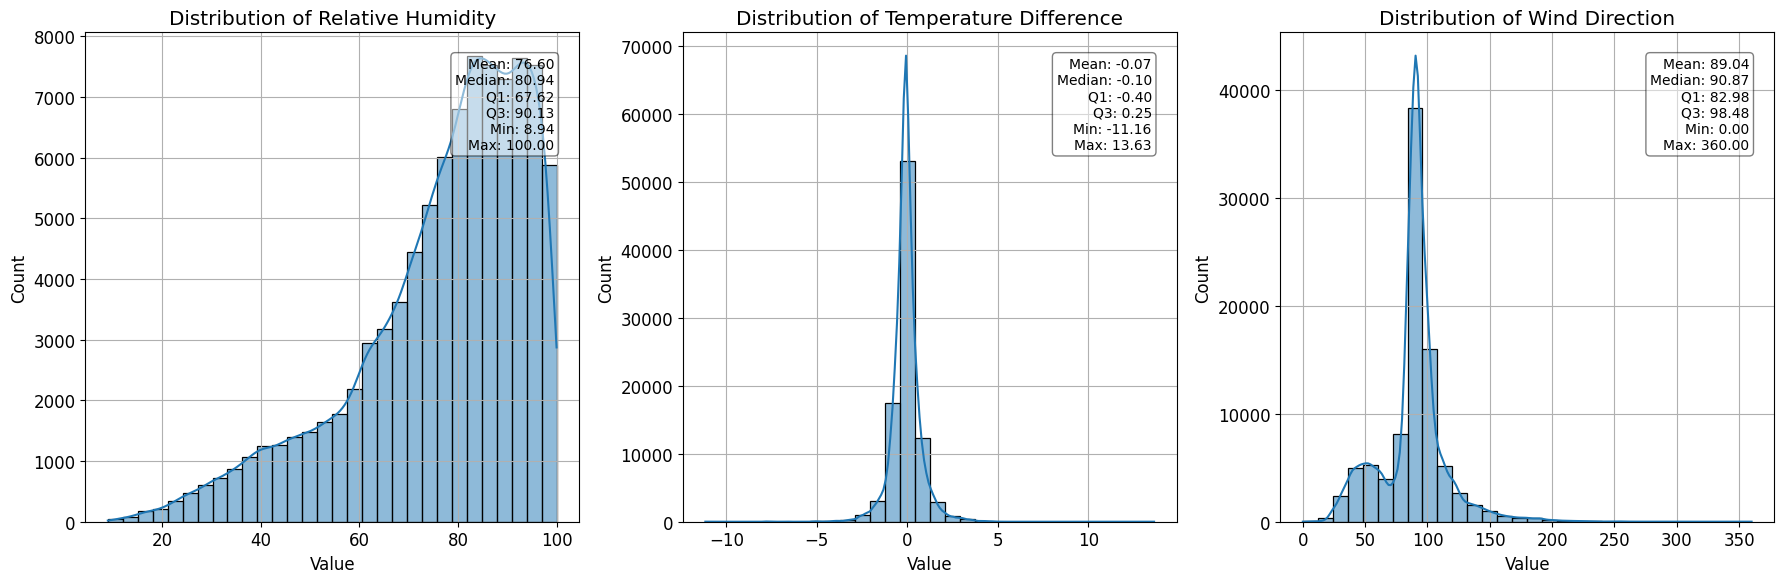

In [9]:
# Function to annotate summary statistics on the plot
def add_summary_statistics(ax, data, title):
    mean = data.mean()
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    min_val = data.min()
    max_val = data.max()

    # Create text box with summary statistics
    textstr = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props)

    ax.set_title(title)
    ax.grid(True)

# Define the variables to plot
variables = ['RH', 'TDiff', 'WD']
titles = ['Relative Humidity', 'Temperature Difference', 'Wind Direction']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot each variable
for i, var in enumerate(variables):
    sns.histplot(data[var], bins=30, kde=True, ax=axes[i])
    add_summary_statistics(axes[i], data[var], f'Distribution of {titles[i]}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

SYNOP Code

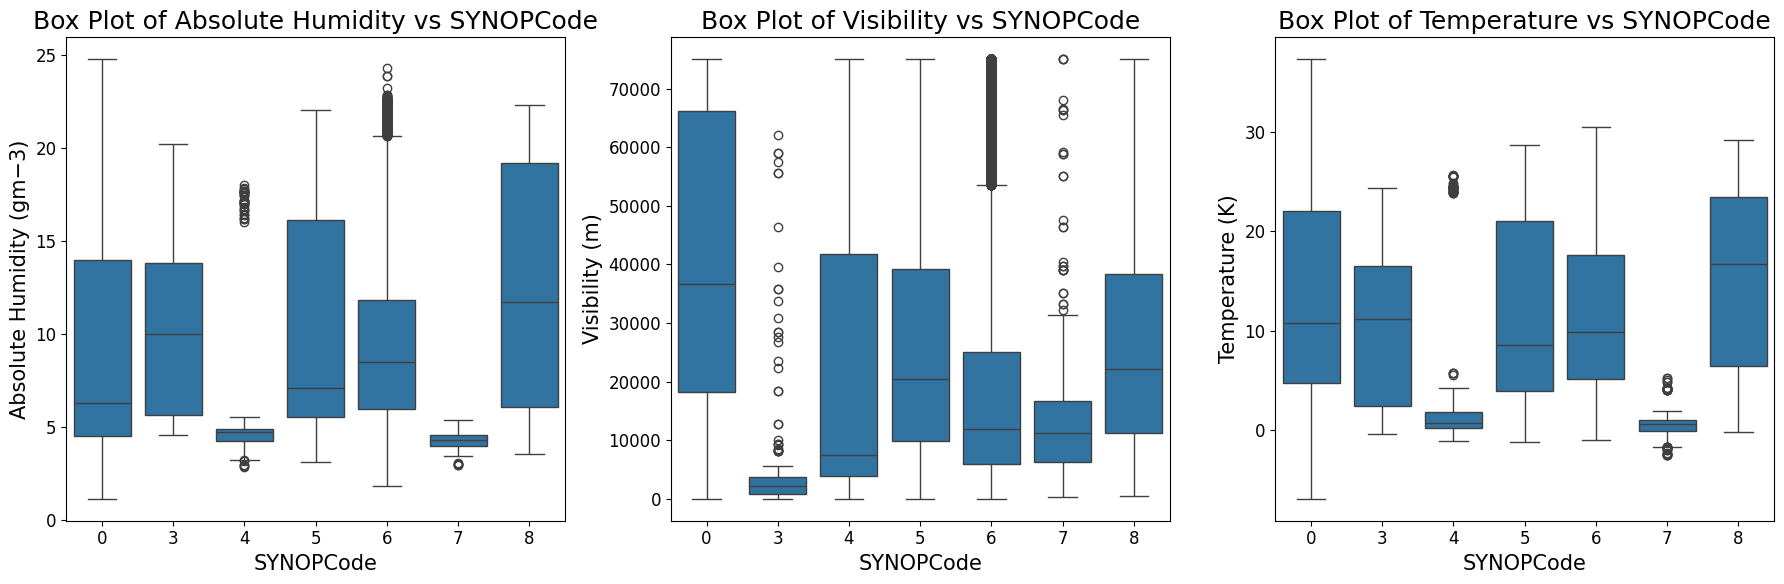

In [12]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot Box Plot for Absolute Humidity
sns.boxplot(data=data, x='SYNOPCode', y='AH', ax=axes[0])
axes[0].set_title('Box Plot of Absolute Humidity vs SYNOPCode', fontsize=18)
axes[0].set_xlabel('SYNOPCode', fontsize=15)
axes[0].set_ylabel('Absolute Humidity (gm−3)', fontsize=15)

# Plot Box Plot for Visibility
sns.boxplot(data=data, x='SYNOPCode', y='Visi', ax=axes[1])
axes[1].set_title('Box Plot of Visibility vs SYNOPCode', fontsize=18)
axes[1].set_xlabel('SYNOPCode', fontsize=15)
axes[1].set_ylabel('Visibility (m)', fontsize=15)

# Plot Box Plot for Temperature
sns.boxplot(data=data, x='SYNOPCode', y='Temp', ax=axes[2])
axes[2].set_title('Box Plot of Temperature vs SYNOPCode', fontsize=18)
axes[2].set_xlabel('SYNOPCode', fontsize=15)
axes[2].set_ylabel('Temperature (K)', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()